In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [2]:
%matplotlib notebook

In [3]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

In [4]:
# Loading in the compressed data
Flattenedfilename = 'Segments_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments_compr_flat_filt.npz
Segments_compr_flat_filt_roughness.jpg
15
2018-07-05/Case2.0 (calibration)


In [5]:
# Histogram accumulation
countslist = []
accumlist = [7,8,9,10,11,12,13,14] # all
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
Z2minforhist = 0
Z2maxforhist = .04
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
nbins_max = 8
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2bins[1],Z2bins[-1]) # This is for Weibull plots
levels = 3; print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [7, 8, 9, 10, 11, 12, 13, 14]
Plotting segments [7, 8, 9, 10, 11, 12, 13, 14]
Z2 ranging from 0 to 0.04
Max number of bins specified is 8
Sturges rule says maxbins = 10
Using nbins =  8
Using levels = 3 for uncertainty analysis


Original =  555
4 0 139 [28 21 15 11  8  5  8]
4 1 139 [18 19 13 15  8  8 13]
4 2 139 [24 16 12  8 10  9  9]
4 3 138 [16 21 23 18  9  4  8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03254955771206134
statsigma =  0.18041495977900873
Original =  1148
4 0 287 [3 1 2 0 4 5 3]
4 1 287 [2 3 4 3 4 2 2]
4 2 287 [2 3 2 2 4 2 2]
4 3 287 [1 4 2 1 4 3 3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.39327369892093245
statsigma =  0.6271153792731705
Original =  1131
4 0 283 [23 17 22 14 15 21 14]
4 1 283 [25 21 20 25 16 10 12]
4 2 283 [29 31 14 18 18 16 11]
4 3 282 [23 18 27 21 17 11 10]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.06831709545506597
statsigma =  0.261375391831492
Original =  704
4 0 176 [0 2 4 4 1 1 1]
4 1 176 [3 0 2 4 4 1 2]
4 2 176 [2 4 1 1 4 3 4]
4 3 176 [2 1 2 3 4 3 2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.3671362534106288
statsigma =  0.6059176952446832
Original =  756
4 0 189 [72 53 35 10  5 11  3]
4 1 189 [77 50 3

<IPython.core.display.Javascript object>


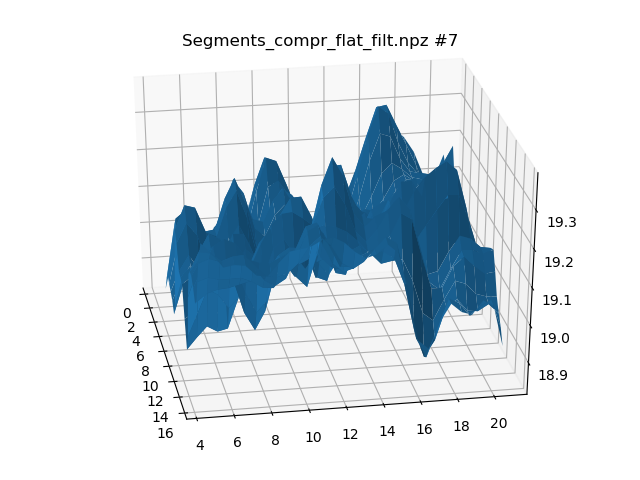

integral =  0.004514446227929374


<IPython.core.display.Javascript object>


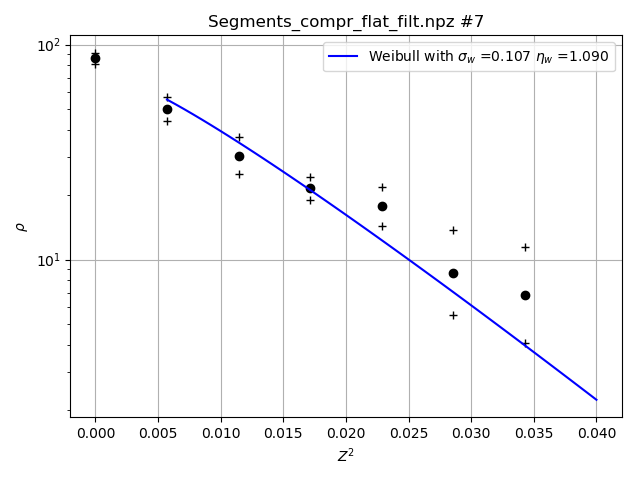

[80.99535049 44.0688195  25.03984138 18.96465577 14.39008713  5.51968491
  4.07499861]
Original =  756
4 0 189 [61 51 26 24  9  7  3]
4 1 189 [61 48 30 15  9  6  8]
4 2 189 [56 50 31 19 12  3  6]
4 3 189 [70 47 24 13 12 11  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.013479838871023287
statsigma =  0.11610270828461879


<IPython.core.display.Javascript object>


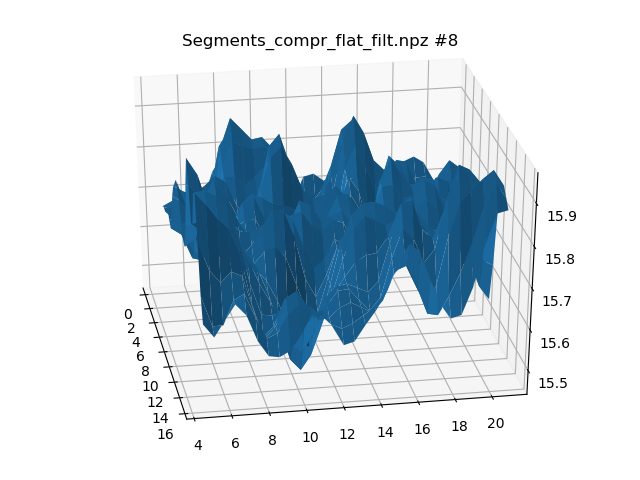

integral =  0.004645858343337334


<IPython.core.display.Javascript object>


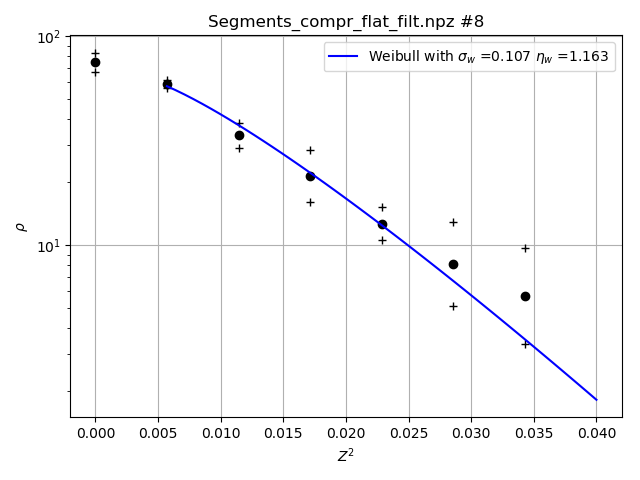

[67.16855928 56.5536528  29.27238008 16.10624957 10.56606336  5.12410603
  3.37528375]
Original =  756
4 0 189 [68 42 27 21  6  5  6]
4 1 189 [73 43 22 17 13  6  5]
4 2 189 [67 49 29 17 11  7  2]
4 3 189 [65 53 24 21  4  7  2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.012991250301396228
statsigma =  0.11397916608484301


<IPython.core.display.Javascript object>


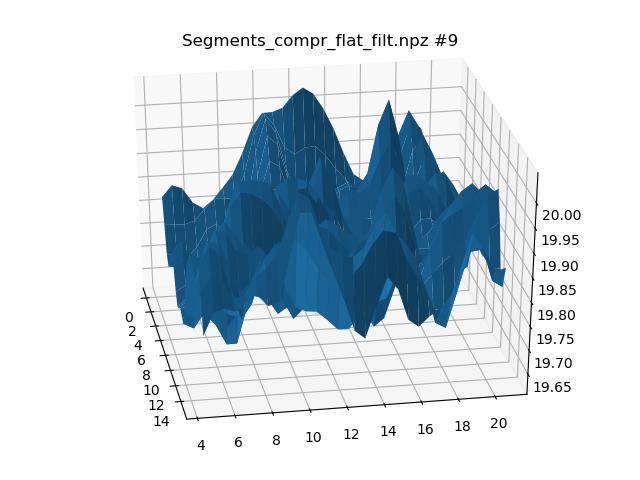

integral =  0.0045585874799357945


<IPython.core.display.Javascript object>


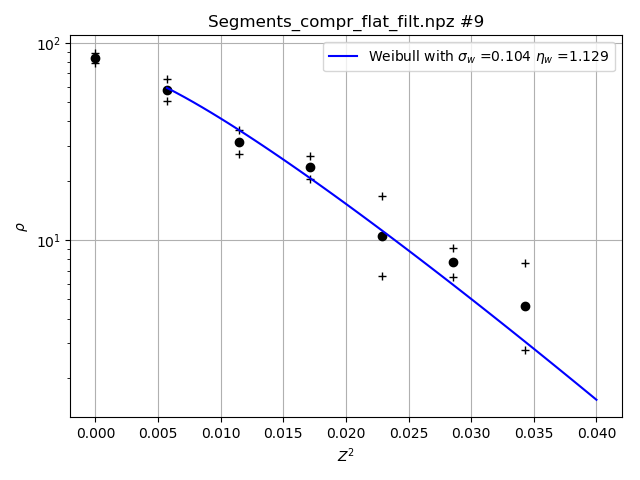

[79.35351186 50.83241054 27.40840955 20.43007314  6.56969949  6.50453426
  2.78247104]
Original =  756
4 0 189 [66 36 41 15 10 11  3]
4 1 189 [70 39 30 20 14  7  2]
4 2 189 [74 41 27 16 10  2  8]
4 3 189 [61 49 34 14  9  3 10]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.012717886287719487
statsigma =  0.11277360634350347


<IPython.core.display.Javascript object>


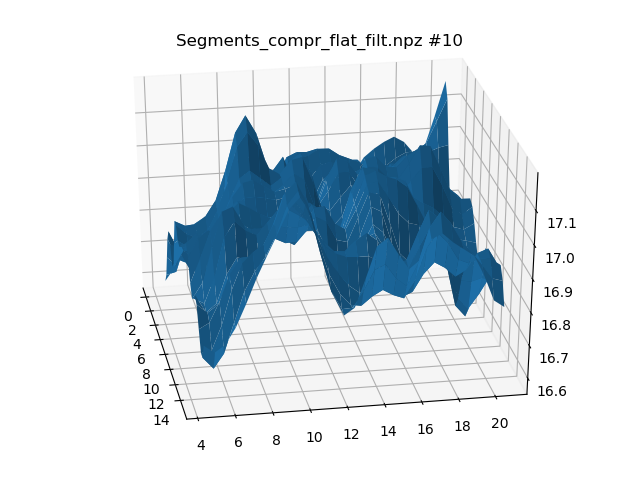

integral =  0.0045508508112386235


<IPython.core.display.Javascript object>


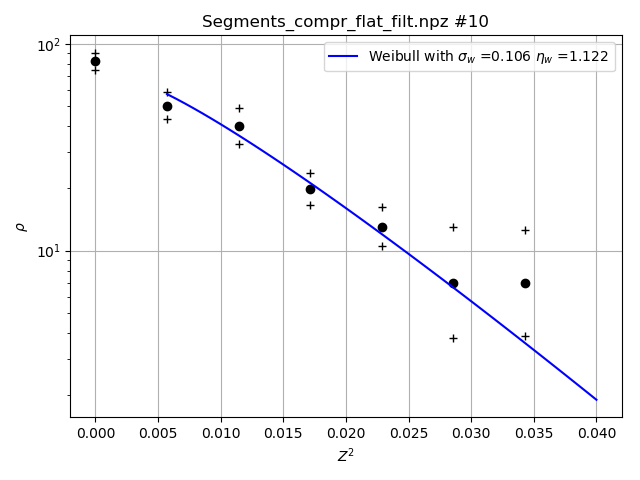

[75.07113474 43.21430277 32.91316797 16.56038794 10.48651147  3.76351768
  3.87269169]
Original =  756
4 0 189 [58 49 32 25  9  6  3]
4 1 189 [68 44 36 13  7  8  3]
4 2 189 [76 41 24 13 15 11  3]
4 3 189 [60 46 37 24  9  7  3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.012501238781765102
statsigma =  0.11180893873821136


<IPython.core.display.Javascript object>


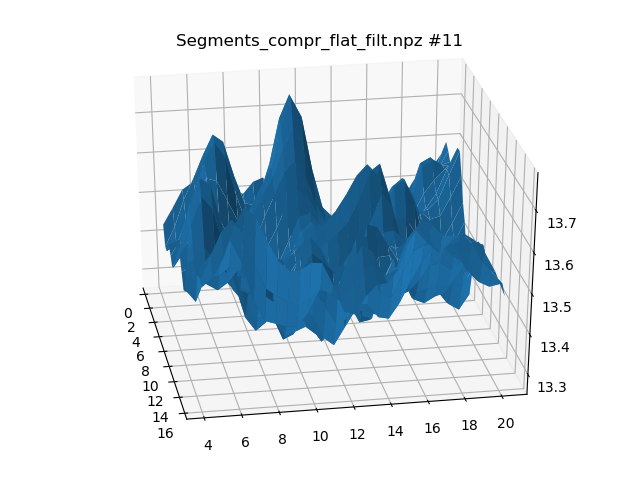

integral =  0.004641878669275929


<IPython.core.display.Javascript object>


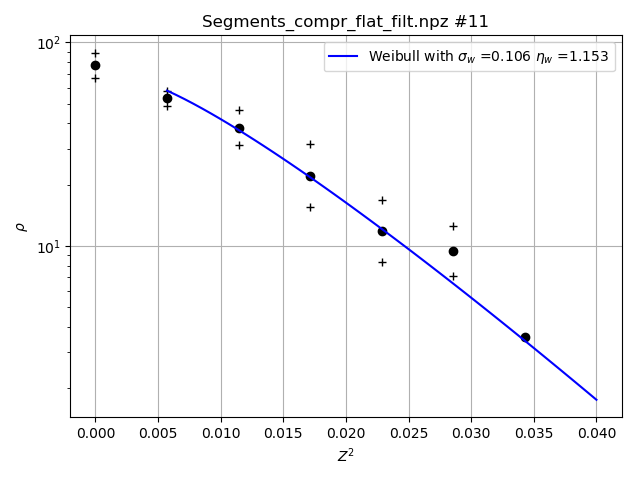

[67.17608945 48.73635088 31.19703588 15.51547414  8.33368263  7.12910808
  3.54131535]
Original =  756
4 0 189 [78 51 19 15  6  9  4]
4 1 189 [75 49 32  6 10  9  1]
4 2 189 [71 56 26 13 11  4  3]
4 3 189 [80 45 29 14  8  4  5]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.010991361619547047
statsigma =  0.1048396948657666


<IPython.core.display.Javascript object>


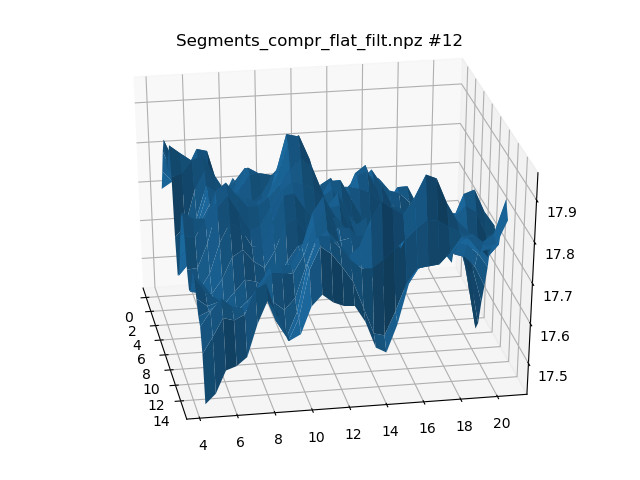

integral =  0.004478659130773729


<IPython.core.display.Javascript object>


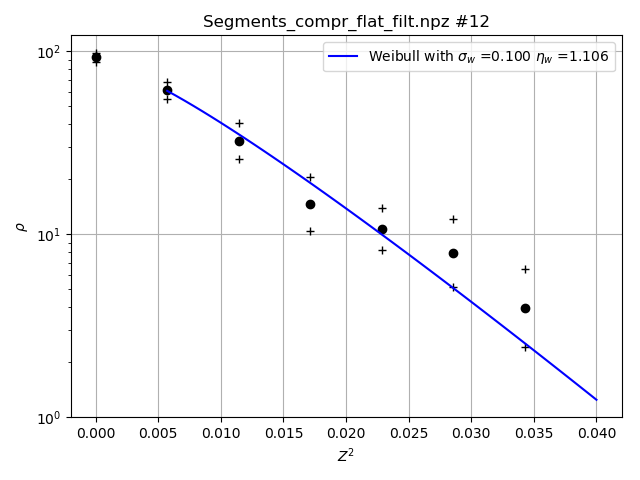

[87.20075901 55.18839548 25.77764373 10.37708773  8.17181139  5.16315695
  2.42681124]
Original =  756
4 0 189 [60 45 35 11  8  7  8]
4 1 189 [58 46 29 10 13  8  4]
4 2 189 [72 37 25 17  6 11  1]
4 3 189 [63 43 26 16 10  9  4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.01531807321592186
statsigma =  0.12376620385194764


<IPython.core.display.Javascript object>


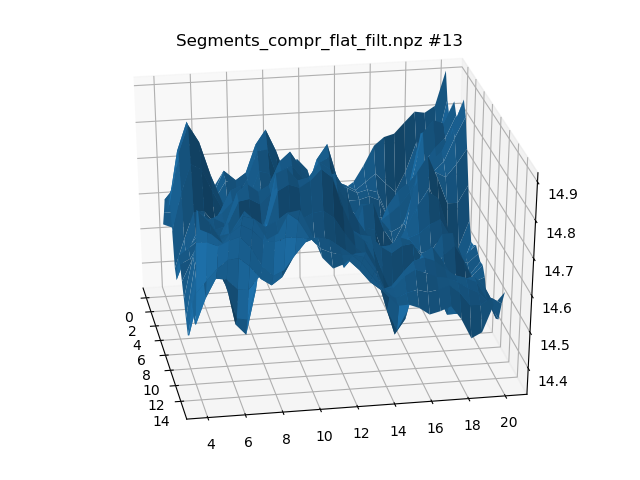

integral =  0.004583158776707163


<IPython.core.display.Javascript object>


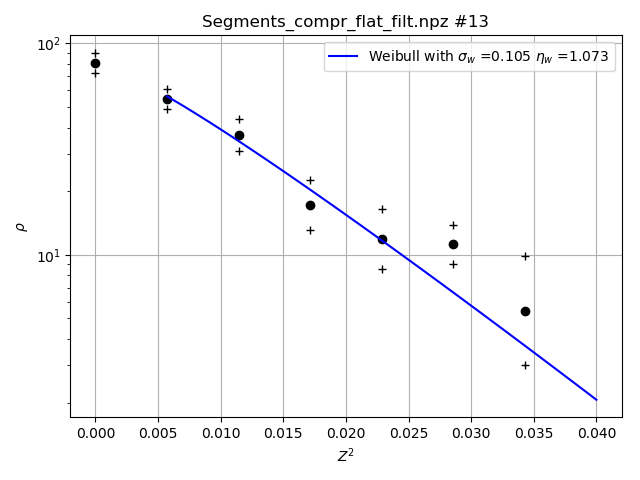

[72.42724015 49.13705638 30.9647631  13.16020708  8.52766481  9.06930585
  3.0006798 ]
Original =  756
4 0 189 [68 46 33 19  9  9  2]
4 1 189 [78 39 29 18  8  5  5]
4 2 189 [65 54 24 17 12  7  5]
4 3 189 [62 50 21 28  7 12  4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.011792506933557335
statsigma =  0.10859330980109841


<IPython.core.display.Javascript object>


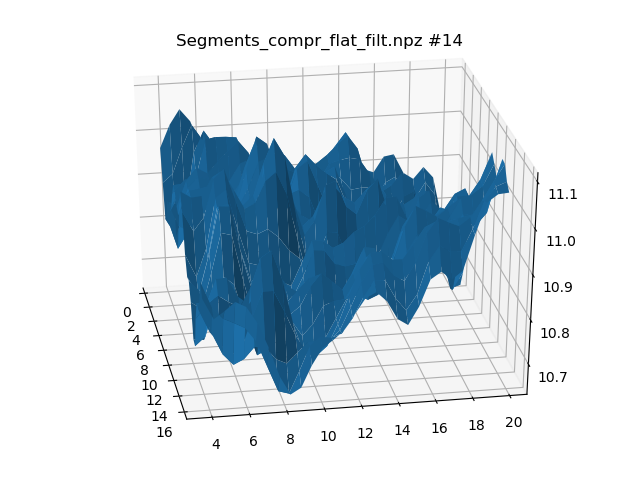

integral =  0.004592391304347826


<IPython.core.display.Javascript object>


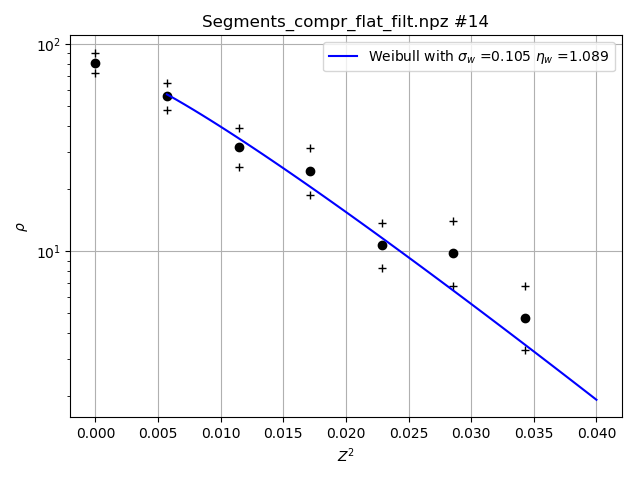

[71.96381425 48.09017645 25.5528136  18.70335777  8.26566714  6.80300098
  3.32178695]


In [6]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function
        integral_rho = np.trapz(counts, bins)
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Attempt a best-fit
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        
        # Graph the best-fit probability
        myWeibull = Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  756
4 0 189 [68 46 33 19  9  9  2]
4 1 189 [78 39 29 18  8  5  5]
4 2 189 [65 54 24 17 12  7  5]
4 3 189 [62 50 21 28  7 12  4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.011792506933557335
statsigma =  0.10859330980109841
integral =  0.004592391304347826
eta_W =  1.1138299176366633
sigma_W =  0.105487197837843


<IPython.core.display.Javascript object>


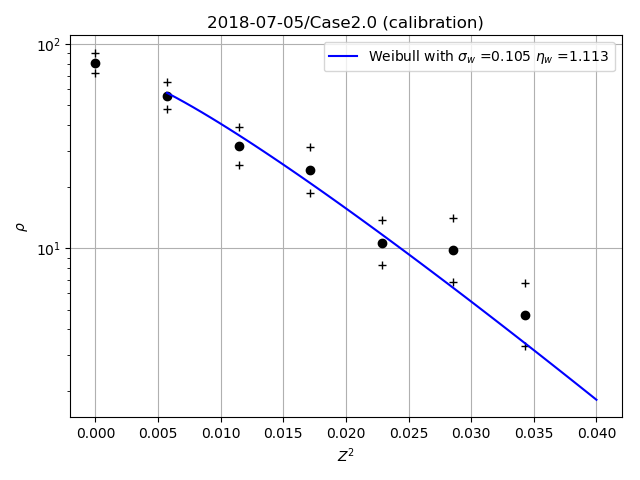

[71.96381425 48.09017645 25.5528136  18.70335777  8.26566714  6.80300098
  3.32178695]


In [9]:
# Sum up the accumulated informaion
Naccum, Laccum = np.shape(Z2flat_list)
Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho

# Get the best Weibull parameters
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta; print ('eta_W = ',etaW)
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W); print ('sigma_W = ',sigmaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

In [10]:
plt.savefig(Roughnessfilename)